In [1]:
#Import Dependencies
#pandas dataframes and statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#curve fitting
from scipy.stats import linregress
#CSV usage
import os
import csv
import pathlib

In [2]:
#US Region Breakdown
north = ['CT','ME','MA','MO','NE','NH','NJ','NY','PA','RI','VT']
west = ['AZ','CO','CA','ID','MT','NM','NV','OR','UT','WA','WY']
mid = ['IL','IN','IA','KS','MI','MN','ND','OH','SD','WI']
south = ['AL','AR','DE','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','TX','VA','WV']

In [3]:
#Load Region Data from CSV into dataframe
allRegions_df = pd.read_csv('price_per_state.csv') 
allRegions_df.sort_values(by = 'Date (YYYY/MM)', ascending = True, inplace = True)

#Display Dataframe
allRegions_df

,AL,AZ,AR,CA,CO,CT,DE,FL,GA,ID,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,Date (YYYY/MM)
250,5.54,6.35,5.69,8.71,5.55,9.76,6.11,7.43,5.90,4.43,...,5.59,6.90,4.67,10.95,5.86,4.79,4.98,5.90,4.31,200101
249,5.31,6.48,5.60,9.63,5.79,9.06,5.38,7.48,6.20,4.50,...,5.51,6.91,5.26,11.12,6.03,5.11,4.99,5.98,4.36,200102
248,5.87,6.57,5.73,9.89,5.66,9.38,6.31,7.51,6.10,4.39,...,5.48,7.02,4.92,10.84,6.06,5.37,5.15,5.93,4.34,200103
247,5.72,6.87,6.04,9.88,5.91,9.61,6.31,7.87,6.19,4.38,...,5.51,7.04,5.39,10.42,6.05,5.40,5.00,6.02,4.26,200104
246,5.60,7.86,6.16,9.82,6.20,9.57,6.74,7.87,6.23,5.12,...,5.55,7.34,5.42,10.56,6.17,5.22,5.04,5.98,4.40,200105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,10.87,11.48,9.35,20.93,11.61,19.43,10.23,10.64,11.40,8.31,...,10.11,8.82,9.07,16.23,9.59,8.88,8.85,11.41,8.22,202107
3,10.96,11.22,9.47,21.35,11.64,17.36,10.43,10.72,11.42,8.57,...,10.09,9.16,8.85,16.21,9.72,8.75,8.83,11.32,7.99,202108
2,10.75,11.18,9.49,21.57,11.50,19.62,11.12,11.13,10.96,8.13,...,10.09,9.22,8.89,16.53,9.57,8.82,9.06,11.33,8.28,202109
1,10.53,10.57,9.09,19.99,11.05,18.83,10.86,10.92,10.95,8.20,...,9.88,9.02,8.33,17.00,9.46,8.97,9.13,11.04,8.19,202110


In [4]:
#Create DataFrames
north_df = allRegions_df[north] 
south_df = allRegions_df[south] 
mid_df = allRegions_df[mid] 
west_df = allRegions_df[west] 

In [5]:
#compile regions into single dataframe to get average of monthly data for regions
total_columns = ['North','South','Mid-West', 'West']
summed_regions = [north_df.mean(axis=1).values,south_df.mean(axis=1).values,mid_df.mean(axis=1).values,west_df.mean(axis=1).values]

total_df = pd.DataFrame(summed_regions).T
total_df.columns = total_columns
months = allRegions_df['Date (YYYY/MM)']
total_df.index = months

#Display Dataframe
total_df

,North,South,Mid-West,West
Date (YYYY/MM),,,,
200101,9.462727,5.983750,5.806,5.685455
200102,9.319091,5.977500,5.944,6.065455
200103,9.424545,6.121250,5.986,6.118182
200104,9.413636,6.110625,6.028,6.289091
200105,9.320000,6.222500,6.242,6.511818
...,...,...,...,...
202107,15.200000,9.877500,10.878,10.714545
202108,15.030000,10.000625,10.877,10.681818
202109,15.459091,10.095625,10.725,10.650909


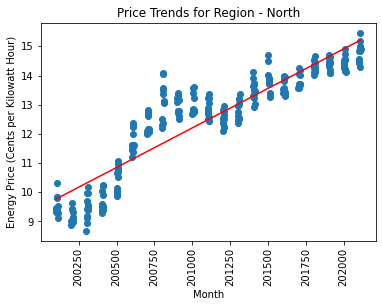

In [6]:
#Create trend lines
#North
usage_North = total_df['North']
plt.scatter(months,usage_North)

# Create equation of line to calculate predicted violent crime rate
(slope, intercept, rvalue, pvalue, stderr) = linregress(months,usage_North)
regress_values_North = months * slope + intercept

#Plot the graph
plt.plot(months,regress_values_North,"r-")
plt.title('Price Trends for Region - North')
plt.xlabel('Month')
plt.ylabel('Energy Price (Cents per Kilowatt Hour)')
plt.xticks(rotation=90)
plt.show()

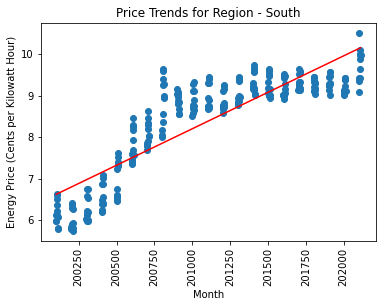

In [7]:
#Create trend lines
#South
usage_South = total_df['South']
plt.scatter(months,usage_South)

# Create equation of line to calculate predicted violent crime rate
(slope, intercept, rvalue, pvalue, stderr) = linregress(months,usage_South)
regress_values_South = months * slope + intercept

#Plot the graph
plt.plot(months,regress_values_South,"r-")
plt.title('Price Trends for Region - South')
plt.xlabel('Month')
plt.ylabel('Energy Price (Cents per Kilowatt Hour)')
plt.xticks(rotation=90)
plt.show()

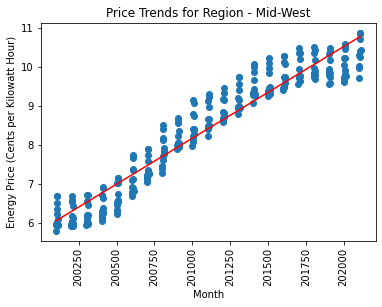

In [8]:
#Create trend lines
#Mid-West
usage_Mid = total_df['Mid-West']
plt.scatter(months,usage_Mid)

# Create equation of line to calculate predicted violent crime rate
(slope, intercept, rvalue, pvalue, stderr) = linregress(months,usage_Mid)
regress_values_Mid = months * slope + intercept

#Plot the graph
plt.plot(months,regress_values_Mid,"r-")
plt.title('Price Trends for Region - Mid-West')
plt.xlabel('Month')
plt.ylabel('Energy Price (Cents per Kilowatt Hour)')
plt.xticks(rotation=90)
plt.show()

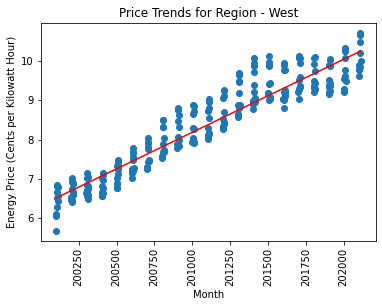

In [9]:
#Create trend lines
#West
usage_west = total_df['West']
plt.scatter(months,usage_west)

# Create equation of line to calculate predicted violent crime rate
(slope, intercept, rvalue, pvalue, stderr) = linregress(months,usage_west)
regress_values_West = months * slope + intercept

#Plot the graph
plt.plot(months,regress_values_West,"r-")
plt.title('Price Trends for Region - West')
plt.xlabel('Month')
plt.ylabel('Energy Price (Cents per Kilowatt Hour)')
plt.xticks(rotation=90)
plt.show()

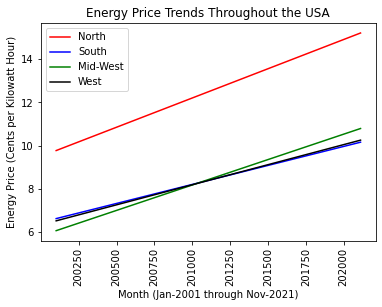

In [10]:
#Plot all the trend lines for comparison
plt.plot(months,regress_values_North, "r-", label='North')
plt.plot(months,regress_values_South, "b-", label='South')
plt.plot(months,regress_values_Mid, "g-", label='Mid-West')
plt.plot(months,regress_values_West, "k-", label='West')
plt.title('Energy Price Trends Throughout the USA')
plt.xlabel('Month (Jan-2001 through Nov-2021)')
plt.ylabel('Energy Price (Cents per Kilowatt Hour)')
plt.xticks(rotation=90)
plt.legend()
plt.show()